In [65]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<h3>0. Input Data</h3>

In [66]:
df = pd.read_excel('input/coba.xlsx')

In [67]:
df.head()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,Pohon 1,Pohon 2,Pohon 3,Daun Segar,Ekstrak,Flavo0id,Kode Daun
0,-0.05,0.01,-0.10,-0.02,0.0,-0.01,-0.01,-0.03,-0.01,1,0,0,1,0,0,A
1,-0.04,0.00,-0.12,-0.01,0.0,-0.01,0.00,-0.03,-0.01,1,0,0,1,0,0,A
2,-0.03,0.00,-0.06,-0.02,0.0,-0.01,0.00,-0.03,0.00,1,0,0,1,0,0,A
3,-0.04,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,1,0,0,1,0,0,A
4,-0.05,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,1,0,0,1,0,0,A


In [68]:
#Menghilangkan kolom tertentu
#Dalam hal ini kolom Label yang berisi data tipe string
df_drop = df.drop(labels=['Kode Daun'], axis = 1)
#df_drop.head()

In [69]:
cols = df_drop.columns.tolist()

In [70]:
x = df_drop.iloc[:, :].values

<h3>1. Standarisasi Data</h3>

In [71]:
x_std = StandardScaler().fit_transform(x)

<h3>2. Perhitungan Matriks Kovarian</h3>

In [72]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('\nNumPy covariance matrix: \n%s' %np.cov(x_std.T))

Covariance matrix 
[[ 1.00037051e+00  1.52649875e-01  5.54168724e-01  3.01557257e-01
  -7.07832629e-02  2.03855724e-01  2.77497254e-01  2.34829098e-01
  -1.28385975e-02  2.13431676e-01 -1.78238155e-01 -3.51935210e-02
  -2.74358094e-01  2.53544721e-01  2.08133726e-02]
 [ 1.52649875e-01  1.00037051e+00 -2.10501849e-01  7.21470845e-01
   4.17417903e-01  2.59129422e-01  7.14942870e-01  6.36876226e-01
   4.56107525e-01  1.28891603e-01 -9.50922393e-02 -3.37993636e-02
  -5.53653754e-02  1.10730751e-01 -5.53653754e-02]
 [ 5.54168724e-01 -2.10501849e-01  1.00037051e+00 -1.96205647e-01
  -5.87148803e-01 -1.50493953e-01 -2.69003614e-01 -2.77380848e-01
  -5.09447176e-01  1.37805757e-01 -2.43031016e-01  1.05225259e-01
  -1.73797460e-01  1.70386254e-01  3.41120590e-03]
 [ 3.01557257e-01  7.21470845e-01 -1.96205647e-01  1.00037051e+00
   3.92741157e-01  3.44432540e-01  8.33749041e-01  8.05880482e-01
   4.85392557e-01  9.55080830e-02 -4.53074397e-03 -9.09773390e-02
  -4.63948183e-02  7.15857548e-02 -2

Text(0.5, 1.0, 'Correlation between different features')

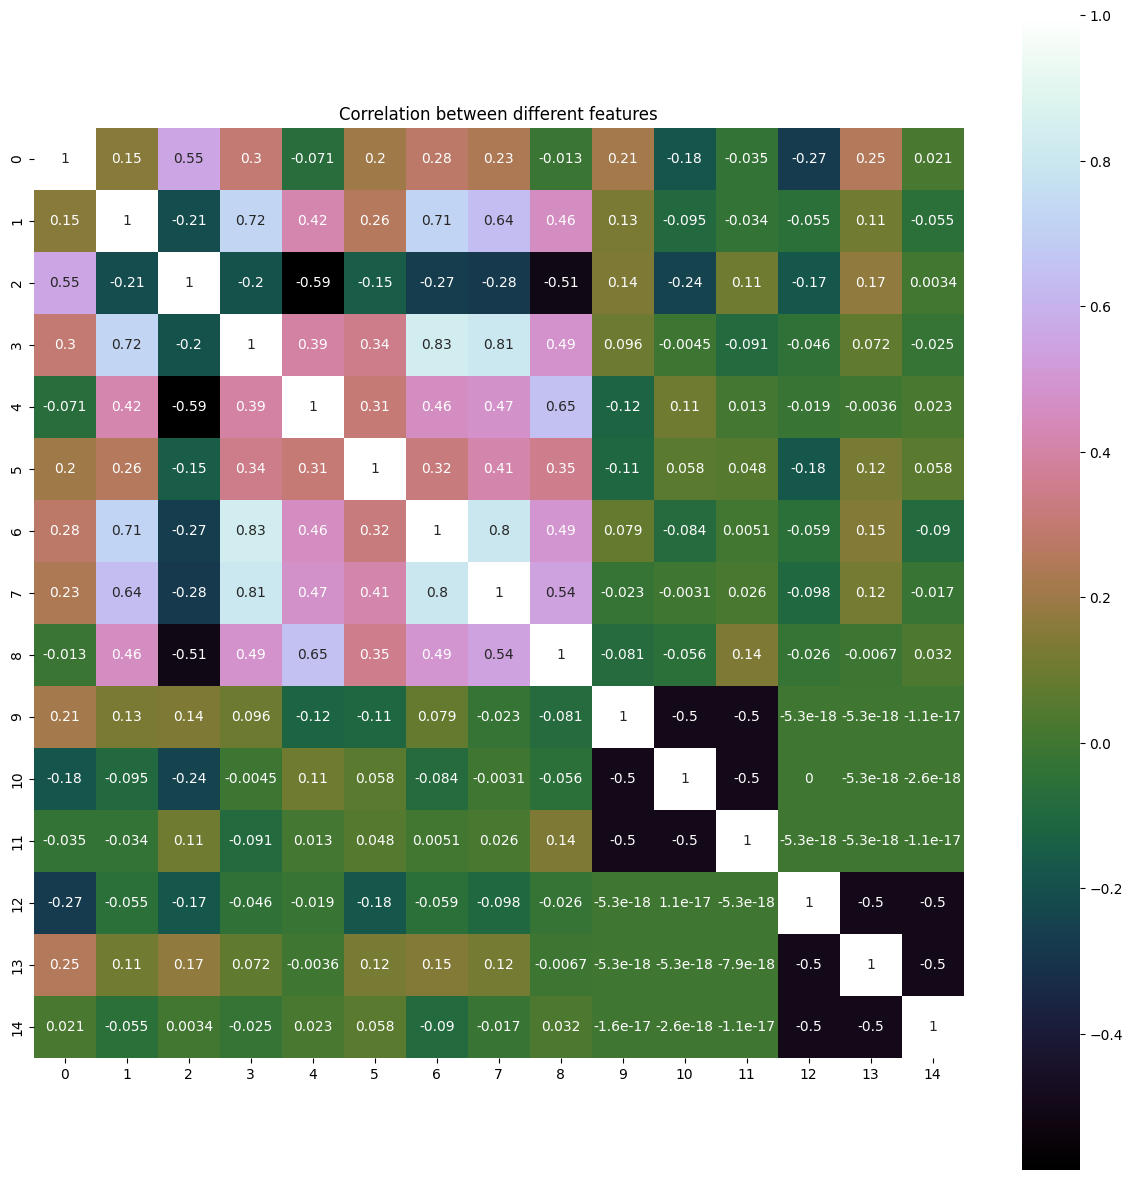

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

<h3>3. Perhitungan Eigenvalue dan Eigenvector</h3>

In [77]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvalues \n%s' %eig_vals)
#print('\nEigenvectors \n%s' %eig_vecs)

<h4>Persentase Eigenvalue</h4>

In [78]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.448681934433914
2.318214205683235
1.6154227619459098
1.5405509609602204
1.503083392928029
1.0358803077971865
0.7759891142601116
0.5620872931297677
0.37128135294084047
0.3324387427489378
0.20770076806009555
0.16098299906807886
0.133243779974755
7.781357437223915e-17
7.670377123672248e-17


In [79]:
tot = sum(eig_vals)
#print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
#print(var_exp)

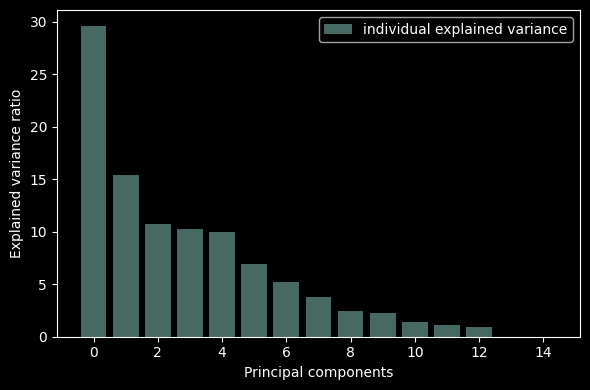

In [86]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(15), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [87]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(15,1), eig_pairs[1][1].reshape(15,1)))
print('Matrix W:\n', matrix_w)

Y = x_std.dot(matrix_w)

Matrix W:
 [[-0.09650131 -0.50867709]
 [-0.37308221 -0.08685759]
 [ 0.20778354 -0.49107798]
 [-0.40910497 -0.1149009 ]
 [-0.32548482  0.25209531]
 [-0.24240942 -0.03860076]
 [-0.41707802 -0.10539135]
 [-0.41641397 -0.0585563 ]
 [-0.34866337  0.17529175]
 [-0.0032991  -0.30050503]
 [ 0.0038281   0.29683279]
 [-0.000529    0.00367223]
 [ 0.05209628  0.29905181]
 [-0.06627207 -0.31754927]
 [ 0.01417578  0.01849746]]


C:\Users\putri\AppData\Local\Temp\ipykernel_14300\262826243.py:3: MatplotlibDeprecationWarning:

Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



Text(0, 0.5, 'Cumulative explained variance')

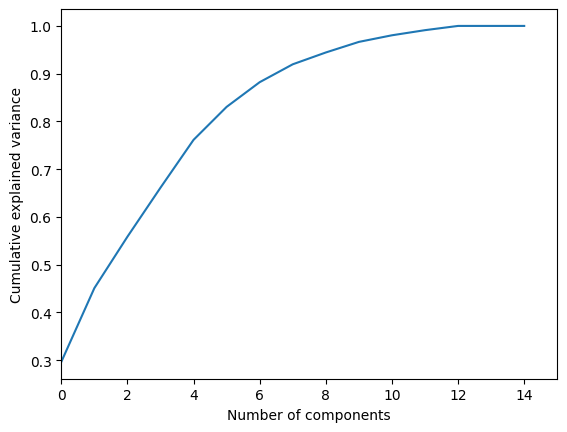

In [89]:
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,15,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

<h3>4. Reduksi Dimensi</h3>

In [90]:
sklearn_pca = PCA(n_components=9)
#Y_sklearn = sklearn_pca.fit_transform(x_std)
#Y_sklearn
components = sklearn_pca.fit_transform(x_std)
#print(components)

fig2D_KD = px.scatter(
    components, x=0, y=1, color=df['Kode Daun'],
    labels={'0': 'PC1', '1': 'PC2'}
)

fig2D_KD.show()


In [63]:
total_var = pca.explained_variance_ratio_.sum()*100

fig3D = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Treatment'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC1', '1': 'PC 2', '2': 'PC 3'}
)

fig3D.show()